 <h1 style="text-align: center;">Trabajo Practico 1: Metodos Computacionales</h1>

### Ejercicio 1 


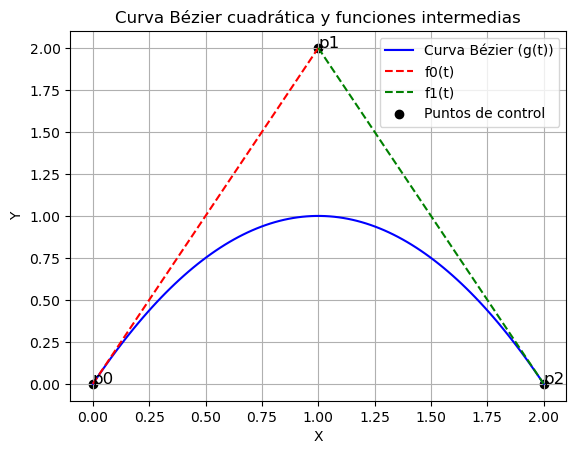

In [3]:
#parte 1
import numpy as np
import matplotlib.pyplot as plt

# Definir función de Bézier cuadrática
def bezier_quadratic(t, p0, p1, p2):
    return (1 - t)**2 * np.array(p0) + 2 * (1 - t) * t * np.array(p1) + t**2 * np.array(p2)

# Definir función f0 y f1 para gráficas intermedias
def f0(t, p0, p1):
    return (1 - t) * np.array(p0) + t * np.array(p1)

def f1(t, p1, p2):
    return (1 - t) * np.array(p1) + t * np.array(p2)

# Puntos de control
p0 = [0, 0]
p1 = [1, 2]
p2 = [2, 0]

# Valores de t
t_vals = np.linspace(0, 1, 100)

# Cálculo de curvas
bezier_curve = [bezier_quadratic(t, p0, p1, p2) for t in t_vals]
f0_curve = [f0(t, p0, p1) for t in t_vals]
f1_curve = [f1(t, p1, p2) for t in t_vals]

# Conversión a arrays
bezier_curve = np.array(bezier_curve)
f0_curve = np.array(f0_curve)
f1_curve = np.array(f1_curve)

# Gráfico de las curvas
plt.plot(bezier_curve[:, 0], bezier_curve[:, 1], label="Curva Bézier (g(t))", color='blue')
plt.plot(f0_curve[:, 0], f0_curve[:, 1], '--', label="f0(t)", color='red')
plt.plot(f1_curve[:, 0], f1_curve[:, 1], '--', label="f1(t)", color='green')
plt.scatter([p0[0], p1[0], p2[0]], [p0[1], p1[1], p2[1]], color='black', label="Puntos de control")

# Etiquetas y leyenda
plt.title('Curva Bézier cuadrática y funciones intermedias')
plt.text(p0[0], p0[1], "p0", fontsize=12)
plt.text(p1[0], p1[1], "p1", fontsize=12)
plt.text(p2[0], p2[1], "p2", fontsize=12)

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


Parte 2 


Luego, la función que define la curva de Bézier cuadrática es una interpolación lineal entre \( f_0(t) \) y \( f_1(t) \):

\[
g(t) = (1 - t) f_0(t) + t f_1(t)
\]

### Cálculo de la fórmula de \( g(t) \):

Sustituyendo las fórmulas de \( f_0(t) \) y \( f_1(t) \) en \( g(t) \):

\[
g(t) = (1 - t)((1 - t)p_0 + t p_1) + t((1 - t)p_1 + t p_2)
\]

Expandiendo los términos:

\[
g(t) = (1 - t)^2 p_0 + 2t(1 - t) p_1 + t^2 p_2
\]

Esta es la ecuación general de una curva de Bézier cuadrática.


Parte 3 

En el gráfico, \( f_0(t) \) y \( f_1(t) \) son líneas que interpolan entre los puntos \( p_0 \), \( p_1 \), y \( p_2 \). La curva de Bézier \( g(t) \) es una curva suave que pasa cerca de los puntos de control, pero solo toca \( p_0 \) y \( p_2 \). La relación entre \( f_0(t) \), \( f_1(t) \), y \( g(t) \) es la base para construir curvas de Bézier de mayor grado, como la cúbica, que utiliza cuatro puntos de control.

### Extensión a una curva cúbica:

Para una curva de Bézier cúbica, se requiere un conjunto de cuatro puntos de control \( p_0, p_1, p_2, p_3 \). Se pueden definir las funciones intermedias \( f_0(t) \), \( f_1(t) \), y \( f_2(t) \), y luego la curva sería una interpolación entre \( f_0(t) \), \( f_1(t) \), y \( f_2(t) \), lo que permite extender el concepto de manera directa.


 ### Ejercicio 2 

### Parte 1: Cálculo de la fórmula para \( h(t) \)

Dado que \( g_1(t) \) es la curva de Bézier cuadrática definida por \( p_0 \), \( p_1 \), y \( p_2 \), y \( g_2(t) \) es la curva de Bézier cuadrática definida por \( p_1 \), \( p_2 \), y \( p_3 \), la función \( h(t) \) es una interpolación lineal entre ambas:

\[
h(t) = (1 - t)g_1(t) + t g_2(t)
\]

Para obtener una fórmula para \( h(t) \) que solo dependa de \( p_0, p_1, p_2 \), y \( p_3 \), sustituimos las fórmulas de \( g_1(t) \) y \( g_2(t) \) usando las fórmulas de las curvas de Bézier cuadráticas.

Sabemos que:

\[
g_1(t) = (1 - t)^2 p_0 + 2t(1 - t)p_1 + t^2 p_2
\]
\[
g_2(t) = (1 - t)^2 p_1 + 2t(1 - t)p_2 + t^2 p_3
\]

Sustituyendo estas en \( h(t) \), tenemos:

\[
h(t) = (1 - t) \left( (1 - t)^2 p_0 + 2t(1 - t)p_1 + t^2 p_2 \right) + t \left( (1 - t)^2 p_1 + 2t(1 - t)p_2 + t^2 p_3 \right)
\]

Expandiendo y simplificando:

\[
h(t) = (1 - t)^3 p_0 + 3t(1 - t)^2 p_1 + 3t^2(1 - t) p_2 + t^3 p_3
\]

Esta es la ecuación general de una curva de Bézier cúbica.

---

### Parte 2: Suma de los coeficientes

Los coeficientes de los puntos de control en función de \( t \) son:

- Para \( p_0 \): \( (1 - t)^3 \)
- Para \( p_1 \): \( 3t(1 - t)^2 \)
- Para \( p_2 \): \( 3t^2(1 - t) \)
- Para \( p_3 \): \( t^3 \)

La suma de los coeficientes siempre será 1 para cualquier valor de \( t \), ya que la fórmula es una interpolación afín. Veamos:

\[
(1 - t)^3 + 3t(1 - t)^2 + 3t^2(1 - t) + t^3 = 1
\]

---

### Parte 3: Implementación en Python

A continuación, implementamos una función en Python que recibe un parámetro \( t \) y una lista con los cuatro puntos de control, y devuelve el valor \( h(t) \). Luego, mostramos el gráfico de \( h(t) \) junto con los cuatro puntos de control para tres ejemplos generados aleatoriamente.


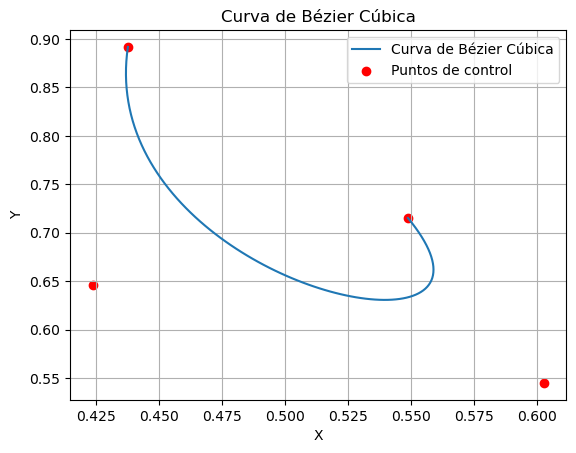

In [2]:

# Función para calcular h(t) en función de los 4 puntos de control
def bezier_cubica(t, puntos_control):
    p0, p1, p2, p3 = puntos_control
    h_t = (1 - t)**3 * p0 + 3 * t * (1 - t)**2 * p1 + 3 * t**2 * (1 - t) * p2 + t**3 * p3
    return h_t

# Generar un conjunto de puntos de control aleatoriamente
np.random.seed(0)  # Fijar semilla para reproducibilidad
puntos_control = np.random.rand(4, 2)

# Generar valores de t
t_values = np.linspace(0, 1, 100)

# Calcular los valores de h(t) para cada t
bezier_curve = np.array([bezier_cubica(t, puntos_control) for t in t_values])

# Graficar la curva de Bézier cúbica junto con los puntos de control
plt.plot(bezier_curve[:, 0], bezier_curve[:, 1], label='Curva de Bézier Cúbica')
plt.scatter(puntos_control[:, 0], puntos_control[:, 1], color='red', label='Puntos de control')

# Añadir etiquetas y leyenda
plt.title('Curva de Bézier Cúbica')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


### Ejercicio 3: Envolvente convexa y curvas de Bézier

#### Definición de combinaciones convexas

Una **combinación convexa** de puntos \( v_1, v_2, \dots, v_k \) en \( \mathbb{R}^n \) es una combinación lineal de la forma:

\[
c_1 v_1 + c_2 v_2 + \dots + c_k v_k
\]

donde:

- \( c_1 + c_2 + \dots + c_k = 1 \)
- \( c_i \geq 0 \) para todo \( i \).

El conjunto de todas las combinaciones convexas de puntos en un conjunto \( S \) se llama el **envolvente convexo** de \( S \) y se denota por \( \text{conv}(S) \).

---

#### Hallar el envolvente convexo de \( S_1 \), \( S_2 \) y \( S_3 \)

Consideramos los siguientes conjuntos de puntos en \( \mathbb{R}^2 \):

- \( S_1 = \{v_1\} \)
- \( S_2 = \{v_1, v_2\} \)
- \( S_3 = \{v_1, v_2, v_3\} \)

Para cada conjunto, el envolvente convexo es:

- **\( S_1 \)**: El envolvente convexo de un solo punto \( v_1 \) es simplemente el punto \( v_1 \) en sí mismo.
- **\( S_2 \)**: El envolvente convexo de \( \{v_1, v_2\} \) es el segmento de línea entre \( v_1 \) y \( v_2 \), es decir, todas las combinaciones convexas de \( v_1 \) y \( v_2 \).
- **\( S_3 \)**: El envolvente convexo de \( \{v_1, v_2, v_3\} \) es el triángulo formado por estos tres puntos, es decir, todas las combinaciones convexas de \( v_1, v_2, v_3 \).

Mostraremos estos resultados utilizando visualizaciones con ejemplos de vectores en \( \mathbb{R}^2 \).

---

#### Curvas de Bézier y el polígono de control

Las curvas de Bézier son **combinaciones convexas** de sus puntos de control. Es decir, una curva de Bézier cuadrática se define como:

\[
g(t) = (1 - t)^2 p_0 + 2t(1 - t) p_1 + t^2 p_2
\]

donde los coeficientes son todos positivos para \( 0 \leq t \leq 1 \), y su suma siempre es igual a 1. Esto demuestra que las curvas de Bézier son combinaciones convexas de sus puntos de control.

Debido a esto, **las curvas de Bézier siempre están contenidas dentro del polígono formado por sus puntos de control**.

Vamos a visualizar cómo las curvas de Bézier están contenidas dentro de sus polígonos de control mediante gráficos de ejemplo.


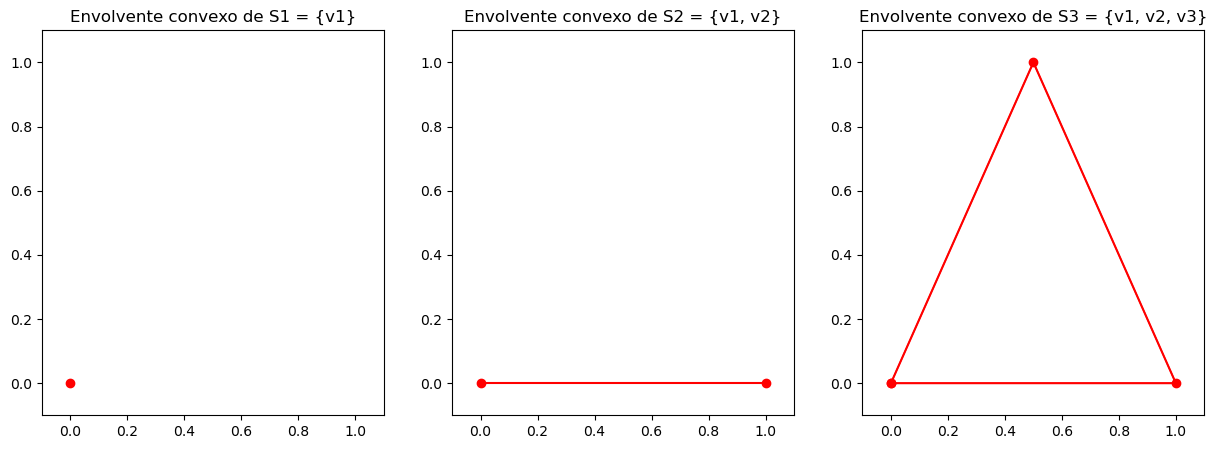

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Definir los puntos de ejemplo en R^2
v1 = np.array([0, 0])
v2 = np.array([1, 0])
v3 = np.array([0.5, 1])

# Visualización del envolvente convexo de S1, S2 y S3
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# S1 = {v1}
ax[0].plot(v1[0], v1[1], 'ro', label='v1')
ax[0].set_title("Envolvente convexo de S1 = {v1}")
ax[0].set_xlim([-0.1, 1.1])
ax[0].set_ylim([-0.1, 1.1])

# S2 = {v1, v2}
ax[1].plot([v1[0], v2[0]], [v1[1], v2[1]], 'ro-')
ax[1].set_title("Envolvente convexo de S2 = {v1, v2}")
ax[1].set_xlim([-0.1, 1.1])
ax[1].set_ylim([-0.1, 1.1])

# S3 = {v1, v2, v3}
polygon = Polygon([v1, v2, v3], closed=True, fill=None, edgecolor='r')
ax[2].add_patch(polygon)
ax[2].plot([v1[0], v2[0], v3[0], v1[0]], [v1[1], v2[1], v3[1], v1[1]], 'ro-')
ax[2].set_title("Envolvente convexo de S3 = {v1, v2, v3}")
ax[2].set_xlim([-0.1, 1.1])
ax[2].set_ylim([-0.1, 1.1])

plt.show()


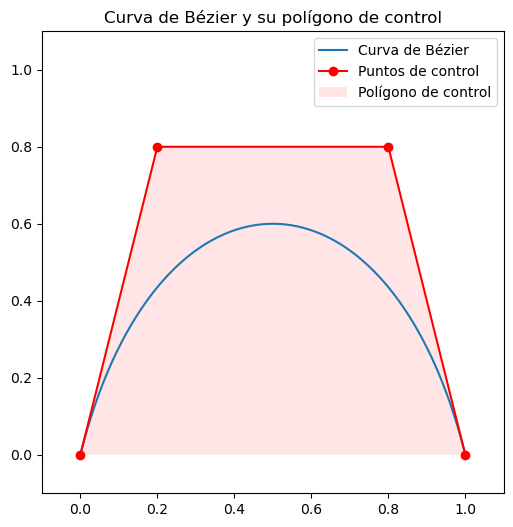

In [5]:
# Función para calcular la curva de Bézier cúbica
def bezier_curve(p0, p1, p2, p3, n=100):
    t = np.linspace(0, 1, n)  # Generar n valores de t entre 0 y 1
    # Calcular la curva de Bézier
    curve = (1 - t[:, np.newaxis])**3 * p0 + \
            3 * t[:, np.newaxis] * (1 - t[:, np.newaxis])**2 * p1 + \
            3 * t[:, np.newaxis]**2 * (1 - t[:, np.newaxis]) * p2 + \
            t[:, np.newaxis]**3 * p3
    return curve

# Puntos de control
p0 = np.array([0, 0])
p1 = np.array([0.2, 0.8])
p2 = np.array([0.8, 0.8])
p3 = np.array([1, 0])

# Calcular la curva de Bézier
curve = bezier_curve(p0, p1, p2, p3)

# Gráfico de la curva de Bézier y el polígono de control
plt.figure(figsize=(6, 6))
plt.plot(curve[:, 0], curve[:, 1], label="Curva de Bézier")
plt.plot([p0[0], p1[0], p2[0], p3[0]], [p0[1], p1[1], p2[1], p3[1]], 'ro-', label="Puntos de control")
plt.fill([p0[0], p1[0], p2[0], p3[0]], [p0[1], p1[1], p2[1], p3[1]], 'r', alpha=0.1, label="Polígono de control")
plt.title("Curva de Bézier y su polígono de control")
plt.legend()
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [6]:
# Función que calcula los coeficientes de los puntos de control para una curva de Bézier cúbica
def bezier_coefficients(t):
    return (1 - t)**3, 3 * t * (1 - t)**2, 3 * t**2 * (1 - t), t**3

# Valores de t a comparar
t_values = [0.3, 0.5, 0.8]

for t in t_values:
    c0, c1, c2, c3 = bezier_coefficients(t)
    print(f"t = {t}: Coeficientes = ({c0:.2f}, {c1:.2f}, {c2:.2f}, {c3:.2f}) -> Suma = {c0 + c1 + c2 + c3:.2f}")


t = 0.3: Coeficientes = (0.34, 0.44, 0.19, 0.03) -> Suma = 1.00
t = 0.5: Coeficientes = (0.12, 0.38, 0.38, 0.12) -> Suma = 1.00
t = 0.8: Coeficientes = (0.01, 0.10, 0.38, 0.51) -> Suma = 1.00


## Ejercicio 4: Curvas Cúbicas de Bézier en Forma Matricial

La forma paramétrica de las curvas cúbicas de Bézier suele escribirse como:

\[
x(t) = (1 - t)^3 p_0 + 3t(1 - t)^2 p_1 + 3t^2(1 - t)p_2 + t^3 p_3
\]

Esta forma se puede leer como una combinación lineal de los puntos de control, donde los pesos son polinomios.

Con esta idea en mente, podemos expresar la forma paramétrica cúbica en forma matricial como:

\[
x(t) = GMBu(t)
\]

donde:

- \( G \) es la matriz geométrica,
- \( MB \) es la matriz base de Bézier,
- \( u(t) \) es el vector columna de potencias de \( t \):

\[
u(t) = \begin{bmatrix}
1 \\
t \\
t^2 \\
t^3
\end{bmatrix}
\]

### Matrices y Vectores

1. **Matriz Geométrica \( G \)**:
   \[
   G = \begin{bmatrix}
   p_0 & p_1 & p_2 & p_3
   \end{bmatrix}
   \]

2. **Matriz Base de Bézier \( MB \)**:
   \[
   MB = \begin{bmatrix}
   (1-t)^3 & 3t(1-t)^2 & 3t^2(1-t) & t^3
   \end{bmatrix}
   \]

### Cálculo de Derivadas

Para calcular las derivadas \( x'(t) \) y \( x''(t) \) utilizando la forma matricial, procedemos de la siguiente manera:

1. **Primera Derivada**:
   \[
   x'(t) = \frac{dx}{dt} = GMB \frac{du(t)}{dt}
   \]
   Donde:
   \[
   \frac{du(t)}{dt} = \begin{bmatrix}
   0 \\
   1 \\
   2t \\
   3t^2
   \end{bmatrix}
   \]

2. **Segunda Derivada**:
   \[
   x''(t) = \frac{d^2x}{dt^2} = GMB \frac{d^2u(t)}{dt^2}
   \]
   Donde:
   \[
   \frac{d^2u(t)}{dt^2} = \begin{bmatrix}
   0 \\
   0 \\
   2 \\
   6t
   \end{bmatrix}
   \]

### Relación del Vector Tangente con los Puntos de Control

Para determinar cómo se relaciona el vector tangente de la curva de Bézier \( x(t) \) con los puntos de control en \( t=0 \) y \( t=1 \):

- En \( t=0 \):
  \[
  x'(0) = GMB \begin{bmatrix}
  0 \\
  1 \\
  0 \\
  0
  \end{bmatrix} = p_1 - p_0
  \]

- En \( t=1 \):
  \[
  x'(1) = GMB \begin{bmatrix}
  0 \\
  1 \\
  0 \\
  0
  \end{bmatrix} = p_3 - p_2
  \]

Esto muestra que el vector tangente en \( t=0 \) apunta en la dirección del segmento entre \( p_0 \) y \( p_1 \), y el vector tangente en \( t=1 \) apunta en la dirección del segmento entre \( p_2 \) y \( p_3 \).


## Ejercicio 5: Curvas de Bézier Compuestas

Sean \( x(t) \) y \( y(t) \) curvas de Bézier cúbicas con los siguientes puntos de control:

- Para \( x(t) \): \( p_0, p_1, p_2, p_3 \)
- Para \( y(t) \): \( p_3, p_4, p_5, p_6 \)

Ambas curvas están unidas en \( p_3 \). A continuación, se responden algunas preguntas sobre la continuidad de la curva compuesta.

### Continuidad \( C^1 \)

Para que la curva compuesta tenga continuidad \( C^1 \) en \( p_3 \), es necesario que los siguientes puntos cumplan la condición:

\[
x(1) = y(0) \quad \text{y} \quad x'(1) = y'(0)
\]

**Justificación**: 
- La primera condición garantiza que ambas curvas se encuentren en el mismo punto \( p_3 \).
- La segunda condición asegura que la dirección (o pendiente) de las curvas en \( p_3 \) coincida, lo que es esencial para que no haya un "salto" en la tangente de la curva compuesta.

### Situación con Vectores Cero

Si \( x'(1) \) y \( y'(0) \) son ambos el vector cero, significa que ambas curvas se encuentran en \( p_3 \) pero no hay una dirección definida en ese punto, lo que provoca un "punto de inflexión". En este caso, la curva compuesta puede ser suave, pero puede no tener una dirección clara al entrar y salir de \( p_3 \), creando una "cusp" o un giro abrupto.

### Continuidad \( C^2 \)

Supongamos que la curva combinada tiene continuidad \( C^2 \) en \( p_3 \), lo que incluye la continuidad \( C^1 \). Si \( x''(1) = y''(0) \), se puede mostrar que \( p_5 \) está completamente determinado por \( p_1, p_2 \) y \( p_3 \).

#### Demostración

Dado que \( y(t) \) es una curva de Bézier cúbica, su forma se puede expresar como:

\[
y(t) = (1 - t)^3 p_3 + 3t(1 - t)^2 p_4 + 3t^2(1 - t)p_5 + t^3 p_6
\]

La continuidad \( C^2 \) implica que las derivadas de primer y segundo orden coinciden en \( p_3 \). Al aplicar la condición de continuidad de la segunda derivada:

1. Calculamos \( x''(1) \) y \( y''(0) \):
   \[
   x''(1) = 6(p_2 - 2p_3 + p_4)
   \]
   \[
   y''(0) = 6(p_4 - 2p_3 + p_5)
   \]

2. Igualando las segundas derivadas:
   \[
   6(p_2 - 2p_3 + p_4) = 6(p_4 - 2p_3 + p_5)
   \]

3. Simplificamos la ecuación:
   \[
   p_2 - 2p_3 + p_4 = p_4 - 2p_3 + p_5
   \]

4. Rearreglamos para encontrar \( p_5 \):
   \[
   p_5 = p_2 + p_3 - p_4
   \]

Esto demuestra que \( p_5 \) está completamente determinado por \( p_1, p_2 \) y \( p_3 \).

### Conclusión

Los puntos \( p_0, p_1, p_2, p_3 \) y la condición \( C^2 \) determinan todos los puntos de control de \( y(t) \) excepto uno, que es \( p_4 \). Esto implica que podemos construir \( y(t) \) de manera coherente con las propiedades geométricas deseadas de la curva compuesta.


## Ejercicio 6: Construcción de una Figura con Curvas de Bézier

El objetivo de este ejercicio es construir una figura utilizando dos curvas de Bézier. Para ello, generaremos dos curvas cúbicas de forma aleatoria y las haremos coincidir en sus puntos extremos utilizando una transformación lineal.

### Generación de Puntos Aleatorios

Primero, escribimos una función en Python que genere 4 puntos al azar en \( \mathbb{R}^2 \) y que estos sirvan como puntos de control para las curvas de Bézier cúbicas.

### Curvas de Bézier

Utilizamos estos puntos para definir dos curvas de Bézier cúbicas, \( x(t) \) y \( y(t) \).

### Transformación Lineal

Analíticamente, dada una transformación lineal \( T(x) \), la transformación de la curva \( T(x(t)) = w(t) \) también debe devolver una curva de Bézier. Esto se puede demostrar al observar que cualquier combinación lineal de los puntos de control se mantiene en la forma de una curva de Bézier después de aplicar la transformación.

Si los puntos \( p_0, \ldots, p_3 \) son los puntos de control de \( x(t) \) y \( q_0, \ldots, q_3 \) son los puntos de control de la curva \( y(t) \), es posible definir la transformación lineal \( T : \mathbb{R}^2 \to \mathbb{R}^2 \) con \( T(p_0) = q_3 \) y \( T(p_3) = q_0 \) si existe una relación entre los puntos de control.

### Visualización

A continuación, mostramos gráficamente las dos curvas \( x(t) \) y \( y(t) \), junto con sus puntos de control, y también la figura resultante de la unión de las curvas \( T(x(t)) \) y \( y(t) \).


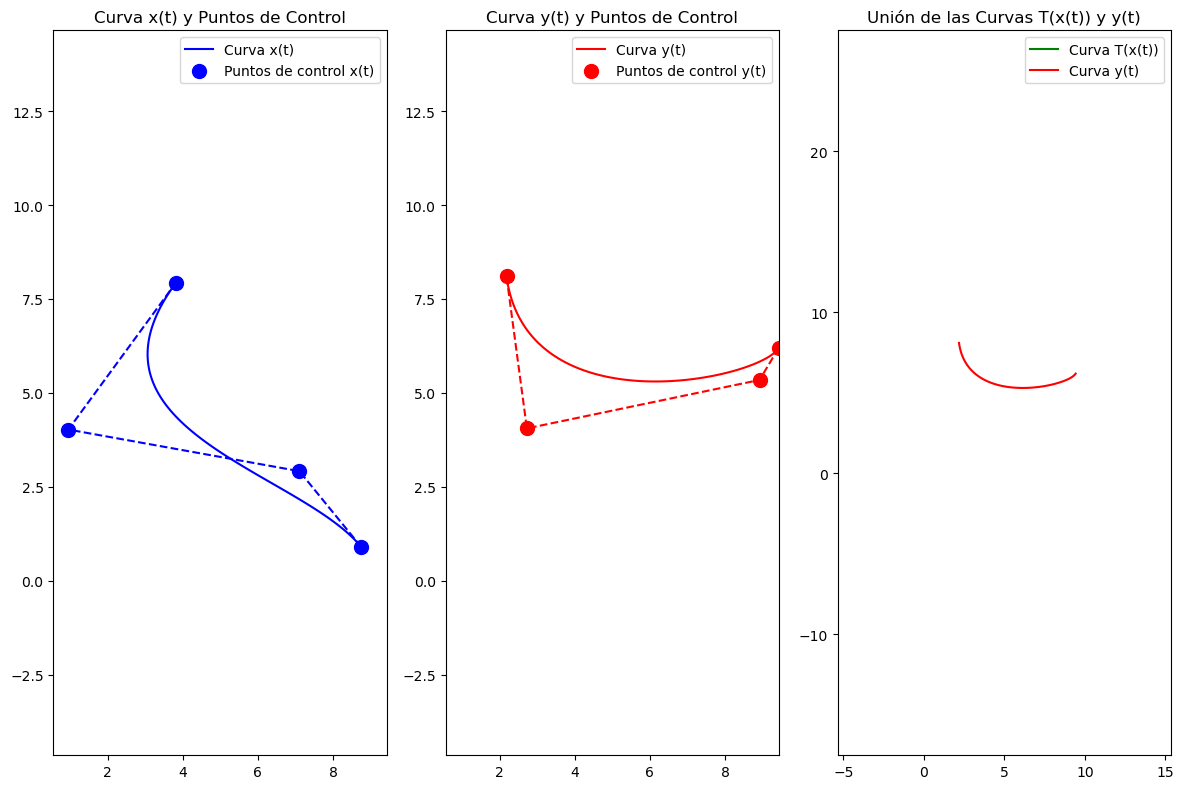

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_points():
    return np.random.rand(4, 2) * 10  # Genera 4 puntos aleatorios en R^2 en el rango [0, 10]

def bezier_curve(p0, p1, p2, p3, n=100):
    t = np.linspace(0, 1, n)
    curve = (1 - t[:, np.newaxis])**3 * p0 + 3 * t[:, np.newaxis] * (1 - t[:, np.newaxis])**2 * p1 + 3 * t[:, np.newaxis]**2 * (1 - t[:, np.newaxis]) * p2 + t[:, np.newaxis]**3 * p3
    return curve

# Generar puntos aleatorios
points_x = generate_random_points()
points_y = generate_random_points()

# Calcular las curvas
curve_x = bezier_curve(points_x[0], points_x[1], points_x[2], points_x[3])
curve_y = bezier_curve(points_y[0], points_y[1], points_y[2], points_y[3])

# Definir la transformación lineal
def transformation_linear(point):
    rotation_matrix = np.array([[0, -1], [1, 0]])  # Rotación de 90 grados
    translation = points_y[3] - points_x[0]  # Desplazamiento
    return np.dot(rotation_matrix, point) + translation

# Aplicar la transformación a los puntos de control de x(t)
transformed_points_x = [transformation_linear(points_x[i]) for i in range(4)]
curve_w = bezier_curve(transformed_points_x[0], transformed_points_x[1], transformed_points_x[2], transformed_points_x[3])

# Gráficos
plt.figure(figsize=(12, 8))

# Curva x(t) y puntos de control
plt.subplot(1, 3, 1)
plt.plot(curve_x[:, 0], curve_x[:, 1], label='Curva x(t)', color='blue')
plt.scatter(points_x[:, 0], points_x[:, 1], color='blue', label='Puntos de control x(t)', s=100)
plt.plot(points_x[:, 0], points_x[:, 1], color='blue', linestyle='--')
plt.title('Curva x(t) y Puntos de Control')
plt.legend()
plt.axis('equal')
plt.xlim(-5, 15)  # Ajustar límites de x
plt.ylim(-5, 15)  # Ajustar límites de y

# Curva y(t) y puntos de control
plt.subplot(1, 3, 2)
plt.plot(curve_y[:, 0], curve_y[:, 1], label='Curva y(t)', color='red')
plt.scatter(points_y[:, 0], points_y[:, 1], color='red', label='Puntos de control y(t)', s=100)
plt.plot(points_y[:, 0], points_y[:, 1], color='red', linestyle='--')
plt.title('Curva y(t) y Puntos de Control')
plt.legend()
plt.axis('equal')
plt.xlim(-5, 15)  # Ajustar límites de x
plt.ylim(-5, 15)  # Ajustar límites de y

# Unión de las curvas
plt.subplot(1, 3, 3)
plt.plot(curve_w[:, 0], curve_w[:, 1], label='Curva T(x(t))', color='green')
plt.plot(curve_y[:, 0], curve_y[:, 1], label='Curva y(t)', color='red')
plt.title('Unión de las Curvas T(x(t)) y y(t)')
plt.legend()
plt.axis('equal')
plt.xlim(-5, 15)  # Ajustar límites de x
plt.ylim(-5, 15)  # Ajustar límites de y

plt.tight_layout()
plt.show()
